In [12]:
import pandas as pd 
data = pd.read_excel(r'/Users/郑乾皓/Desktop/2024.6.1-7.8每小时ttv(损失预测).xlsx', index_col=u'time')

In [13]:
data.head()

,ttv
time,
2024-06-01 00:00:00,1464980.79
2024-06-01 01:00:00,1136103.71
2024-06-01 02:00:00,1034952.17
2024-06-01 03:00:00,1025766.55
2024-06-01 04:00:00,694742.05


In [14]:
data.tail()

,ttv
time,
2024-07-08 17:00:00,3345130.56
2024-07-08 18:00:00,2985824.02
2024-07-08 19:00:00,2732100.68
2024-07-08 20:00:00,2637157.36
2024-07-08 21:00:00,2525435.10


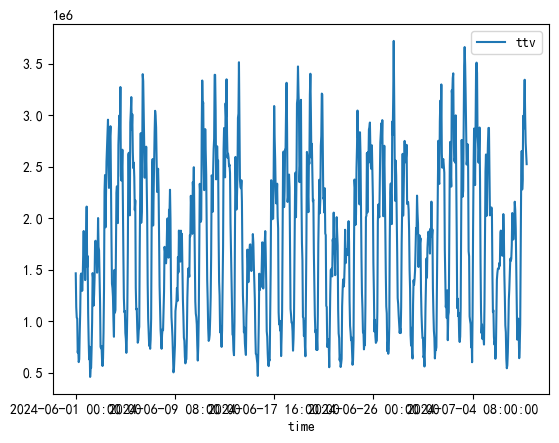

In [15]:
import matplotlib.pyplot as plt     
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   
data.plot()
plt.show()

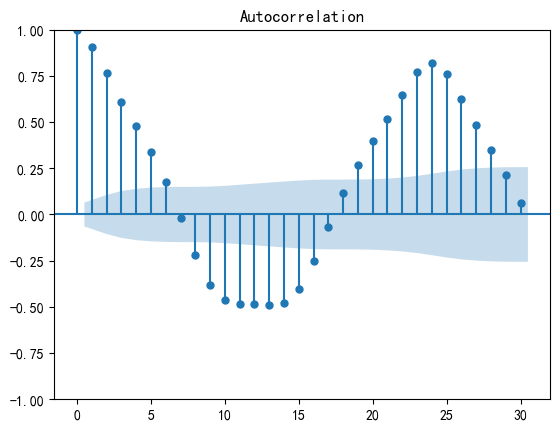

原始序列的检验结果为： (-2.4470904013059744, 0.12888401439964037, 21, 888, {'1%': -3.4377354773501243, '5%': -2.8648002689134535, '10%': -2.5685059946940183}, 24550.369371798773)


In [16]:
#画出自相关性图
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()
 
#平稳性检测
from statsmodels.tsa.stattools import adfuller
print('原始序列的检验结果为：',adfuller(data[u'ttv']))
#原始序列的检验结果为： (1.8137710150945268, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155,
#  '10%': -2.6300945562130176, '5%': -2.981246804733728}, 299.46989866024177)
#返回值依次为：adf, pvalue p值， usedlag, nobs, critical values临界值 , icbest, regresults, resstore 
#adf 分别大于3中不同检验水平的3个临界值，单位检测统计量对应的p 值显著大于 0.05 ， 说明序列可以判定为 非平稳序列

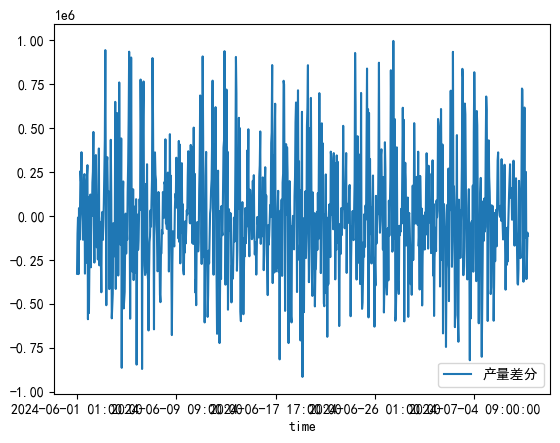

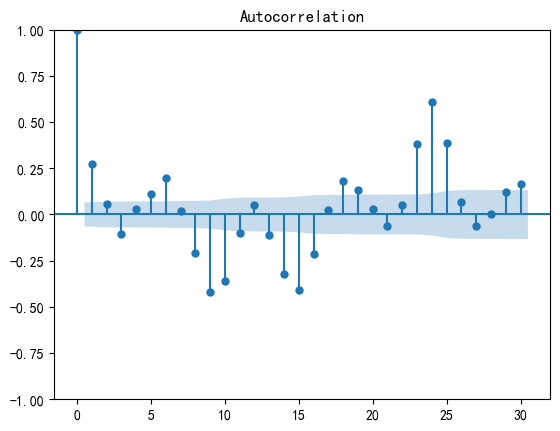

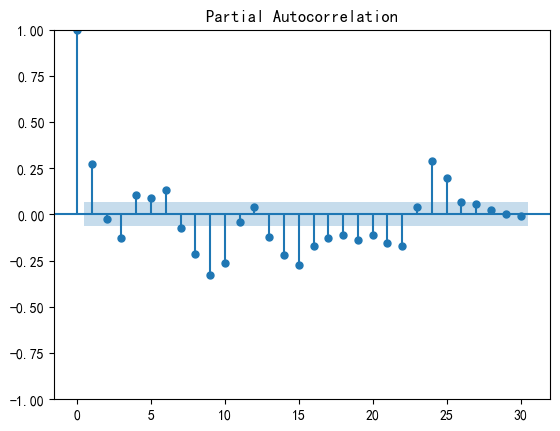

差分序列的ADF 检验结果为：  (-18.24045537345691, 2.355627101277906e-30, 21, 887, {'1%': -3.437743827988169, '5%': -2.864803950716061, '10%': -2.5685079558676054}, 24494.401298361656)


In [17]:
#对数据进行差分后得到 自相关图和 偏相关图
D_data = data.diff().dropna()
# D_data = D_data1.diff().dropna()
D_data.columns = [u'产量差分']
 
D_data.plot()   #画出差分后的时序图
plt.show()
 
plot_acf(D_data)    #画出自相关图
plt.show()
plot_pacf(D_data)   #画出偏相关图
plt.show()
print(u'差分序列的ADF 检验结果为： ', adfuller(D_data[u'产量差分']))   #平稳性检验
#差分序列的ADF 检验结果为：  (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, 
# '10%': -2.6130173469387756, '5%': -2.9485102040816327}, 287.5909090780334)
#一阶差分后的序列的时序图在均值附近比较平稳的波动， 自相关性有很强的短期相关性， 单位根检验 p值小于 0.05 ，所以说一阶差分后的序列是平稳序列

In [18]:
#对一阶差分后的序列做白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(D_data, lags= 16)) #返回统计量和 p 值
# 差分序列的白噪声检验结果： (array([11.30402222]), array([0.00077339])) p值为第二项， 远小于 0.05

差分序列的白噪声检验结果：        lb_stat      lb_pvalue
1    68.767438   1.107869e-16
2    71.510935   2.962086e-16
3    82.108645   1.083090e-17
4    83.035951   3.958629e-17
5    94.238086   8.637114e-19
6   129.553354   1.596103e-25
7   129.855792   6.736870e-25
8   169.182819   1.913093e-32
9   329.230274   1.621175e-65
10  447.930092   5.774536e-90
11  457.608291   3.458923e-91
12  459.995334   7.115759e-91
13  471.616987   1.547871e-92
14  566.689102  6.469091e-112
15  723.014609  2.305994e-144
16  765.915073  1.178336e-152


In [19]:
#判断数据集是否存在季节性
import statsmodels.api as sm
result = sm.tsa.seasonal_decompose(data)
if result.trend is not None:
    print("该时间序列存在趋势")
if result.seasonal is not None:
    print("该时间序列存在季节性")

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [22]:
import pandas as pd
import statsmodels.api as sm

# 假设data是你的时间序列数据
data.index = pd.to_datetime(data.index)  # 将索引转换成DatetimeIndex类型
data.index.freq = 'h'  # 设置频率为每小时

result = sm.tsa.seasonal_decompose(data)
if result.trend is not None:
    print("该时间序列存在趋势")
if result.seasonal is not None:
    print("该时间序列存在季节性")

该时间序列存在趋势
该时间序列存在季节性


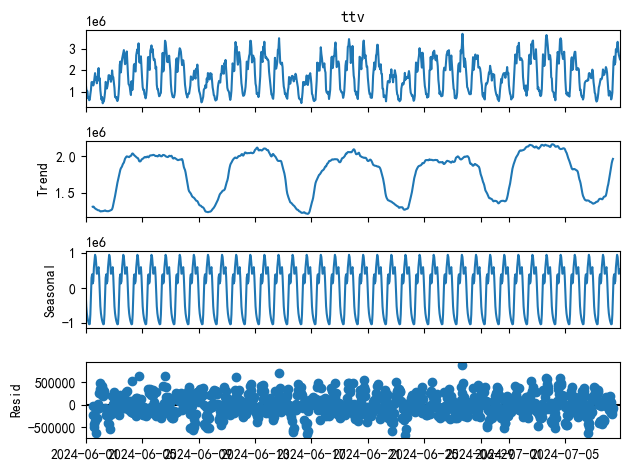

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decomposition = seasonal_decompose(data['ttv'])
ts_decomposition.plot()
plt.show()

In [24]:
def stableCheck(timeseries):
    #移动7期的均值和方差
    rol_mean = timeseries.rolling(window=24).mean()
    rol_std = timeseries.rolling(window=24).std()
    #绘图
    fig  = plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rol_mean,color='red',label='Rolling Mean')
    std = plt.plot(rol_std,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    #进行ADF检验
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    #对检验结果进行语义描述
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        print('ADF检验结果: ')
        print(dfoutput)

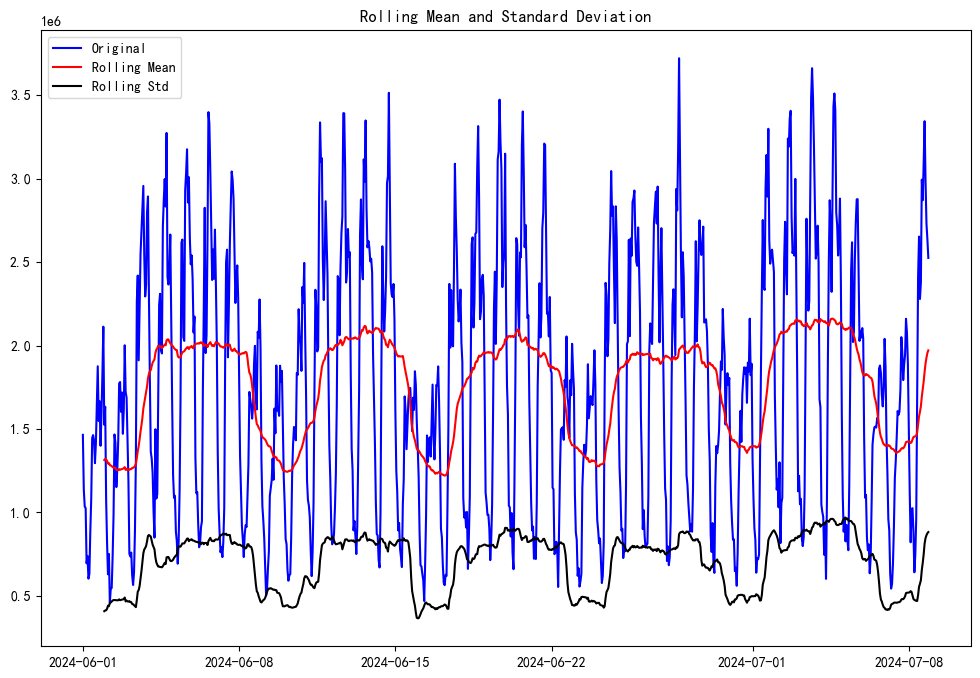

Results of Dickey-Fuller Test: 
ADF检验结果: 
Test Statistic                  -2.447090
p-value                          0.128884
#Lags Used                      21.000000
Number of Observations Used    888.000000
Critical Value (1%)             -3.437735
dtype: float64
ADF检验结果: 
Test Statistic                  -2.447090
p-value                          0.128884
#Lags Used                      21.000000
Number of Observations Used    888.000000
Critical Value (1%)             -3.437735
Critical Value (5%)             -2.864800
dtype: float64
ADF检验结果: 
Test Statistic                  -2.447090
p-value                          0.128884
#Lags Used                      21.000000
Number of Observations Used    888.000000
Critical Value (1%)             -3.437735
Critical Value (5%)             -2.864800
Critical Value (10%)            -2.568506
dtype: float64


In [25]:
stableCheck_result = stableCheck(data)

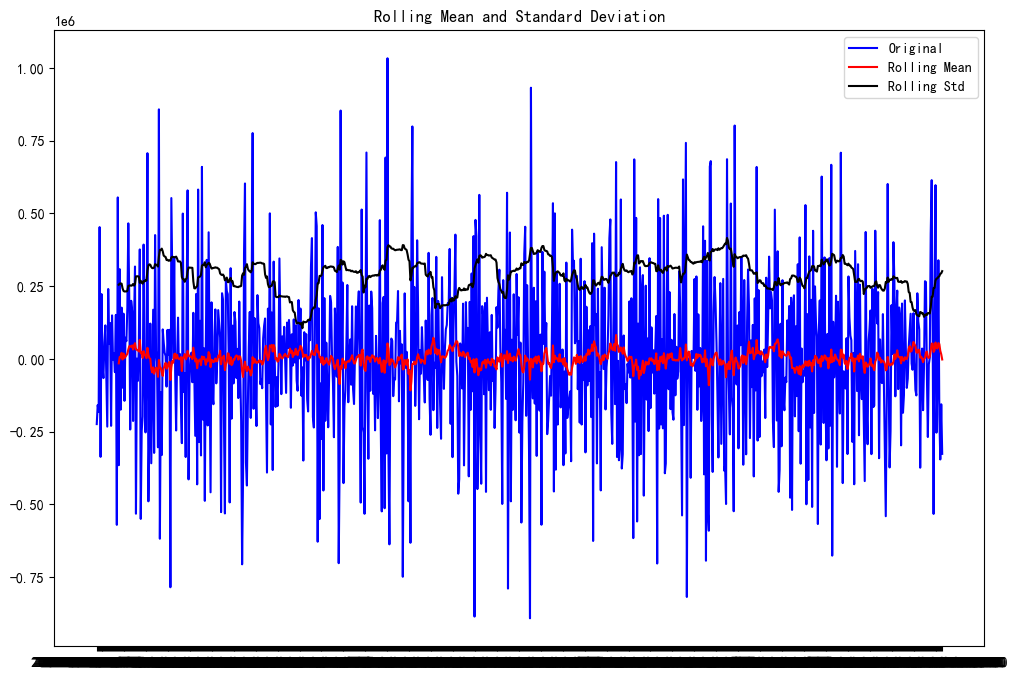

Results of Dickey-Fuller Test: 
ADF检验结果: 
Test Statistic                -1.100222e+01
p-value                        6.638254e-20
#Lags Used                     1.500000e+01
Number of Observations Used    8.690000e+02
Critical Value (1%)           -3.437897e+00
dtype: float64
ADF检验结果: 
Test Statistic                -1.100222e+01
p-value                        6.638254e-20
#Lags Used                     1.500000e+01
Number of Observations Used    8.690000e+02
Critical Value (1%)           -3.437897e+00
Critical Value (5%)           -2.864872e+00
dtype: float64
ADF检验结果: 
Test Statistic                -1.100222e+01
p-value                        6.638254e-20
#Lags Used                     1.500000e+01
Number of Observations Used    8.690000e+02
Critical Value (1%)           -3.437897e+00
Critical Value (5%)           -2.864872e+00
Critical Value (10%)          -2.568544e+00
dtype: float64


In [27]:
# 差分处理非平稳序列，先进行一阶差分
D_data1 = data.diff(1).dropna()
# 在一阶差分基础上进行季节性差分
D_data2 = D_data.diff(24).dropna()
stableCheck_result2 = stableCheck(D_data2)

In [28]:
def whiteNoiseCheck(h_data):
    result = acorr_ljungbox(h_data,lags = 1)
    temp = result[1]
    print('白噪声检测结果: ', result)
    print(temp)
    return result 

In [29]:
#temp小于0.05，则认为序列为非白噪声序列
# ifwhiteNoise = whiteNoiseCheck(D_data2)
# from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(D_data2, lags= 5))

差分序列的白噪声检验结果：      lb_stat     lb_pvalue
1  83.386270  6.748911e-20
2  83.725969  6.593817e-19
3  96.408779  9.194640e-21
4  98.162205  2.421151e-20
5  98.977203  8.681420e-20


In [30]:
def draw_acf(data):
    plot_acf(data)
    plt.title("序列自相关图（ACF）")
    plt.show()

def draw_pacf(data):
    plot_pacf(data)
    plt.title("序列偏自相关图（PACF）")
    plt.show()

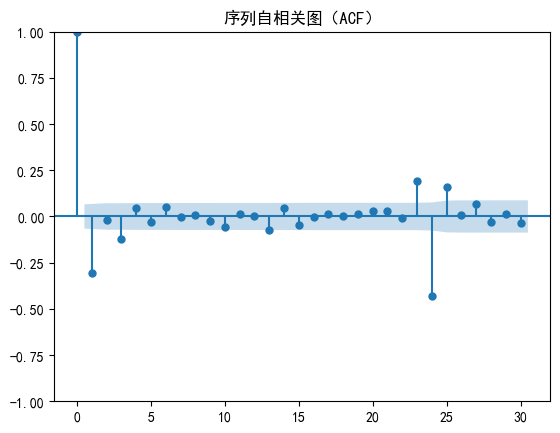

In [31]:
draw_acf(D_data2)

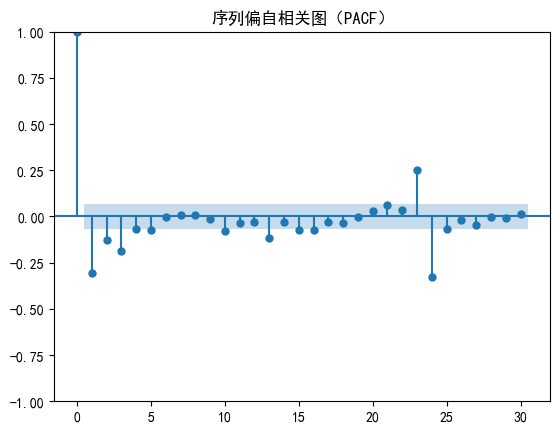

In [32]:
draw_pacf(D_data2)

In [34]:
#利用BIC准则找最优的参数
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from itertools import product 

In [39]:
from pmdarima import auto_arima

# 使用auto_arima函数来自动选择最优的SARIMA模型参数
model = auto_arima(data, start_p=0, start_q=0, max_p=3, max_q=3, m=24, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# 打印出最优的SARIMA模型参数
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[24]             : AIC=inf, Time=5.91 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=24768.262, Time=0.64 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=24546.342, Time=2.93 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=4.10 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=24687.149, Time=0.29 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=24506.417, Time=21.10 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=56.78 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=5.59 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=24526.659, Time=16.93 sec
 ARIMA(2,1,0)(2,1,0)[24]             : AIC=24499.641, Time=25.31 sec
 ARIMA(2,1,0)(1,1,0)[24]             : AIC=24540.645, Time=4.27 sec
 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=74.40 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=7.50 sec
 ARIMA(3,1,0)(2,1,0)[24]             : AIC=24480.035, Time=33.05 sec
 ARIMA(3,1,0)(1,1,0)[24]           

In [44]:
ma1 = SARIMAX(data, order=(2,1,1),seasonal_order=(2,1,1,24)).fit(disp=-1)
resid = ma1.resid
print(acorr_ljungbox(resid, lags=6))

     lb_stat  lb_pvalue
1   0.195489   0.658387
2   0.889762   0.640900
3   3.002764   0.391199
4   6.386846   0.172061
5   7.724354   0.172096
6  16.243847   0.012503


In [45]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                ttv   No. Observations:                  910
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 24)   Log Likelihood              -12174.400
Date:                            Wed, 10 Jul 2024   AIC                          24362.800
Time:                                    11:25:10   BIC                          24396.299
Sample:                                06-01-2024   HQIC                         24375.607
                                     - 07-08-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6592      0.064     10.310      0.000       0.534       0.784
ar.L2          0.1419      0.055      2.604      0.009       0.035       0.249
ma.L1         -0.9393      0.042    -22.336      0.000      -1.022      -0.857
ar.S.L24       0.1852      0.051      3.646      0.000       0.086       0.285
ar.S.L48      -0.0256      0.049     -0.522      0.602      -0.122       0.071
ma.S.L24      -0.9205      0.041    -22.194      0.000      -1.002      -0.839
sigma2      7.174e+10   1.68e-13   4.26e+23      0.000    7.17e+10    7.17e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 9.63
Prob(Q):                              0.62   Prob(JB):                         0.01
Heteroskedasticity (H):               0.85   Skew:                             0.18
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+39. Standard errors may be unstable.
"""

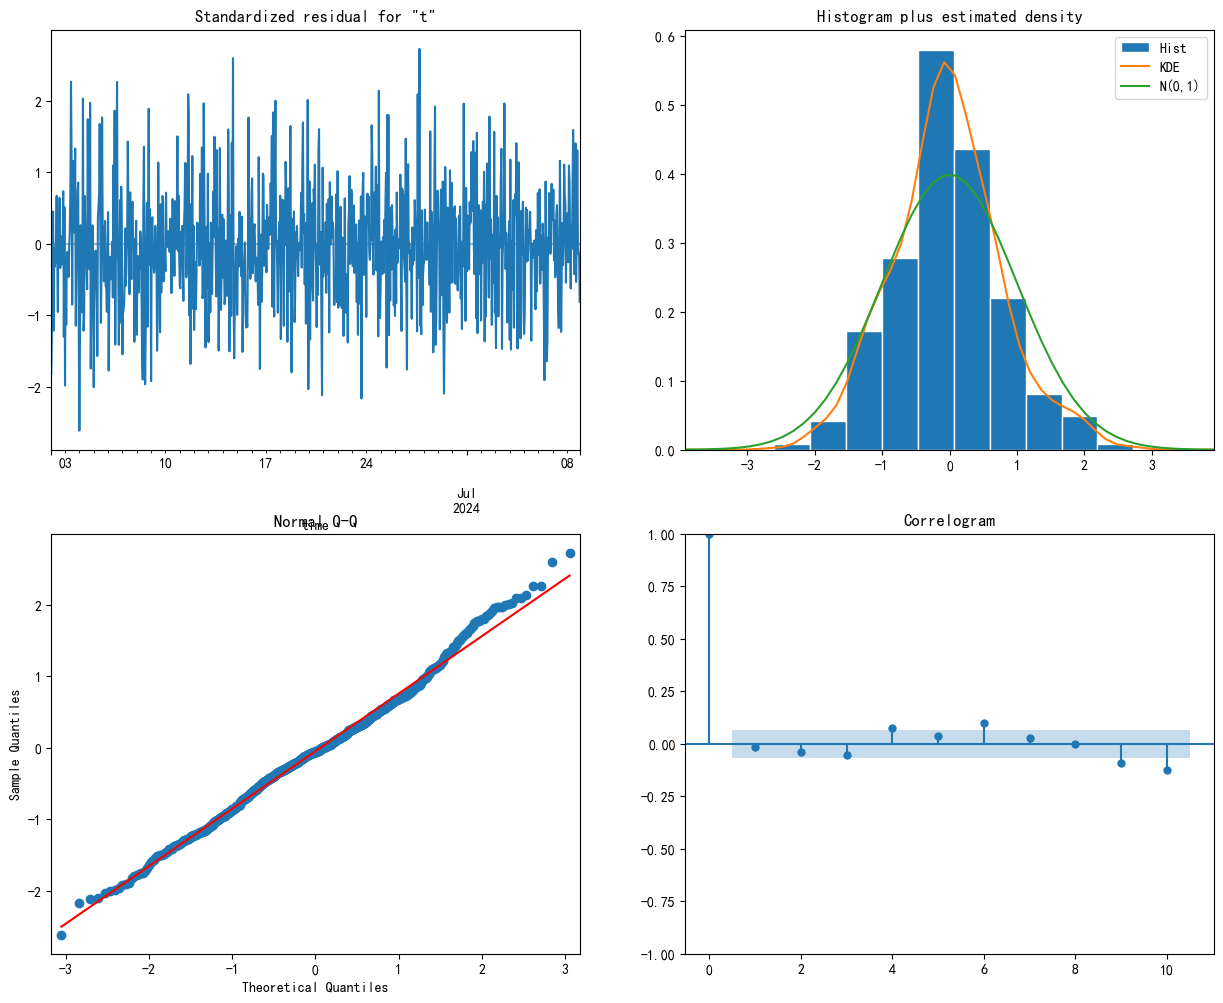

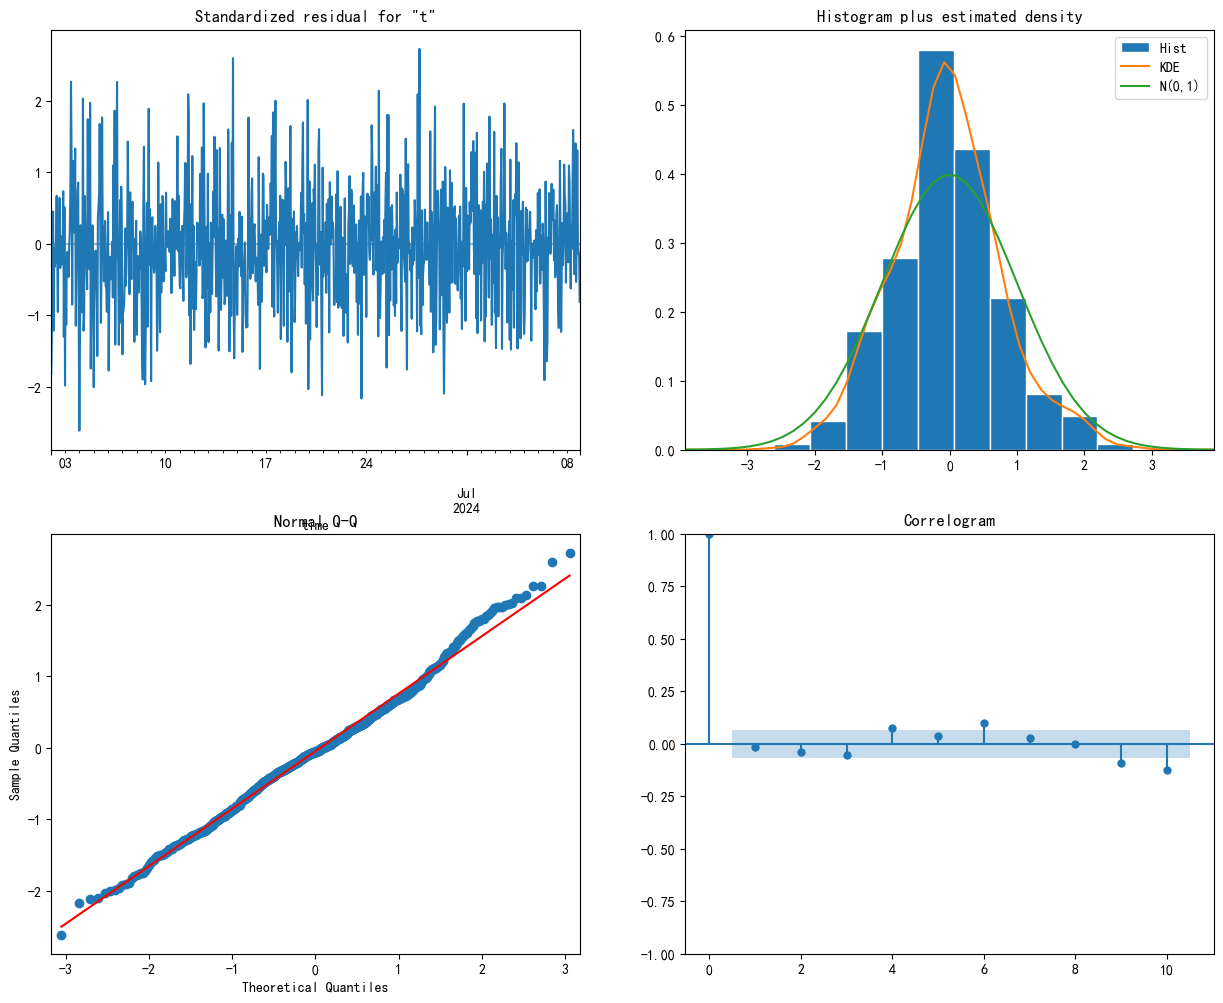

In [49]:
ma1.plot_diagnostics(figsize=(15,12))

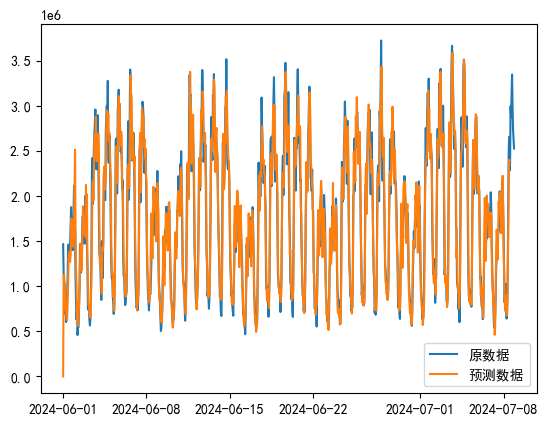

In [56]:
predict_data = ma1.predict(0,900)
plt.plot(data,label = '原数据')
plt.plot(predict_data, label = '预测数据')
plt.legend()
plt.show()

In [58]:
pd.options.display.float_format = '{:.6f}'.format
ma1.forecast(steps = 10, exog = None, alpha = 0.05)

2024-07-08 22:00:00   2586445.279938
2024-07-08 23:00:00   2342933.093176
2024-07-09 00:00:00   1875809.626325
2024-07-09 01:00:00   1490119.636731
2024-07-09 02:00:00   1265293.386280
2024-07-09 03:00:00   1233268.281322
2024-07-09 04:00:00   1158455.319645
2024-07-09 05:00:00   1094628.389736
2024-07-09 06:00:00    980143.921363
2024-07-09 07:00:00   1005619.066126
Freq: h, Name: predicted_mean, dtype: float64